## ***Optimizing Rice Variety Classification Model through Hyperparameter Tuning: A Comparative Study of Activation Functions and Optimizers***

**Student ID: 101435938, Ramana Surriyan Rajendran and 101378418, Pratheep Kumar Venkatrangam**

#### Import necessary libraries

In [ ]:
import random
import pathlib
import os
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns

#### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip "/content/drive/My Drive/Rice_Image_Dataset.zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (55

####Data Preprocessing

###### We referenced the official TensorFlow documentation for the ImageDataGenerator class, which can be found at https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
tf.random.set_seed(42)

# Load the training and test data using the ImageDataGenerator
train_data = keras.utils.image_dataset_from_directory('/content/Rice_Image_Dataset',
                                                     validation_split=0.2,
                                                     subset='training',
                                                     seed=1,
                                                     shuffle=True,
                                                     batch_size=32,
                                                     image_size=(256, 256))

test_data = keras.utils.image_dataset_from_directory('/content/Rice_Image_Dataset',
                                                    validation_split=0.2,
                                                    subset='validation',
                                                    seed=1,
                                                    shuffle=True,
                                                    batch_size=32,
                                                    image_size=(256, 256))

Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


In [ ]:
# Display the number of images for each class in the training set
filenames = pathlib.Path('/content/Rice_Image_Dataset')
for label in train_data.class_names :
    images = list(filenames.glob(f'{label}/*'))
    print(f'{label} : {len(images)}')

Arborio : 15000
Basmati : 15000
Ipsala : 15000
Jasmine : 15000
Karacadag : 15000


In [ ]:
train_data.cardinality().numpy(),  test_data.cardinality().numpy() # The equation is: 60000/40 = cardinality, so it depends on your batch size.

(1875, 469)

#### Split the training set into training and validation sets

In [ ]:
train_set = train_data.take(1500)
val_set = train_data.skip(1500)   #train dataset now has first 1200 elements and the rest goes for val_set

In [ ]:
train_set.cardinality().numpy(), val_set.cardinality().numpy()

(1500, 375)

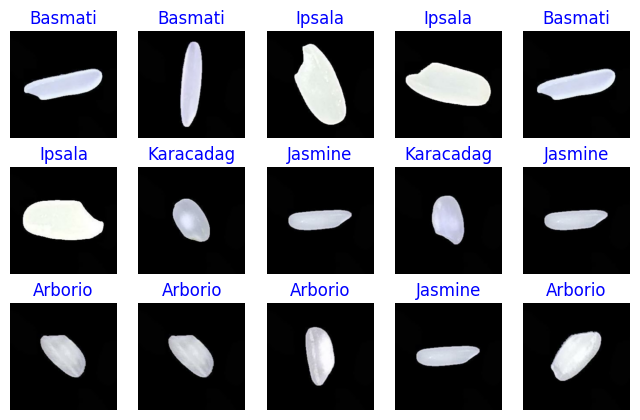

In [ ]:
# print random images from the train set
plt.figure(figsize = (8, 5))
for images, labels in train_set.take(1):
    for i in range(15):
        index = random.randint(0, len(images))
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[index].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[index]], color= 'blue', fontsize= 12)
        plt.axis(False)
plt.show()

#### Building the model

In [ ]:
for images_batch, labels_batch in train_set:
    print(images_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


#### Model with LeakyReLU activation and Adam optimizer

##### We referenced the usage of the LeakyReLU from here https://keras.io/api/layers/activation_layers/leaky_relu/

In [ ]:
cnn_leakyrelu = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(filters=32, kernel_size=3, activation=tf.keras.layers.LeakyReLU()),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(500, activation=tf.keras.layers.LeakyReLU()),
    layers.Dense(5, activation='sigmoid')
])

In [ ]:
# Training with LeakyReLU activation
cnn_leakyrelu.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_leakyrelu = cnn_leakyrelu.fit(
    train_set,
    epochs=5,
    validation_data=val_set
)

Epoch 1/5
1500/1500 [==============================] - 212s 134ms/step - loss: 0.4035 - accuracy: 0.9603 - val_loss: 0.0875 - val_accuracy: 0.9717
Epoch 2/5
1500/1500 [==============================] - 223s 149ms/step - loss: 0.0529 - accuracy: 0.9831 - val_loss: 0.0612 - val_accuracy: 0.9821
Epoch 3/5
1500/1500 [==============================] - 197s 131ms/step - loss: 0.1118 - accuracy: 0.9773 - val_loss: 0.0480 - val_accuracy: 0.9871
Epoch 4/5
1500/1500 [==============================] - 197s 131ms/step - loss: 0.0404 - accuracy: 0.9885 - val_loss: 0.1624 - val_accuracy: 0.9628
Epoch 5/5
1500/1500 [==============================] - 199s 133ms/step - loss: 0.0605 - accuracy: 0.9857 - val_loss: 0.0894 - val_accuracy: 0.9789


In [ ]:
cnn_leakyrelu.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 500)               258064500 
                                                                 
 dense_1 (Dense)             (None, 5)                 2505      
                                                        

#### Model with ReLU activation and RMSprop optimizer

###### We did Reference for RMSprop usage from : https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/RMSprop

In [ ]:
cnn_rmsprop = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(500, activation='relu'),
    layers.Dense(5, activation='sigmoid')
])

In [ ]:
# Training with RMSprop optimizer
cnn_rmsprop.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=['accuracy']
)

history_rmsprop = cnn_rmsprop.fit(
    train_set,
    epochs=5,
    validation_data=val_set
)

Epoch 1/5
1500/1500 [==============================] - 177s 117ms/step - loss: 0.4171 - accuracy: 0.9559 - val_loss: 0.0990 - val_accuracy: 0.9653
Epoch 2/5
1500/1500 [==============================] - 174s 116ms/step - loss: 0.0464 - accuracy: 0.9842 - val_loss: 0.0371 - val_accuracy: 0.9891
Epoch 3/5
1500/1500 [==============================] - 197s 131ms/step - loss: 0.0322 - accuracy: 0.9895 - val_loss: 0.0442 - val_accuracy: 0.9874
Epoch 4/5
1500/1500 [==============================] - 175s 116ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0830 - val_accuracy: 0.9758
Epoch 5/5
1500/1500 [==============================] - 173s 115ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0508 - val_accuracy: 0.9882


In [ ]:
cnn_rmsprop.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 516128)            0         
                                                                 
 dense_2 (Dense)             (None, 500)               258064500 
                                                                 
 dense_3 (Dense)             (None, 5)                 2505      
                                                      

In [ ]:
# Plotting the training curves
def plot_training_curves(history_df):
    plt.figure(figsize=(13, 4), dpi=120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker='.', label='Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker='^', label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    ax = plt.subplot(1, 2, 2)
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker='.', label='Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker='^', label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

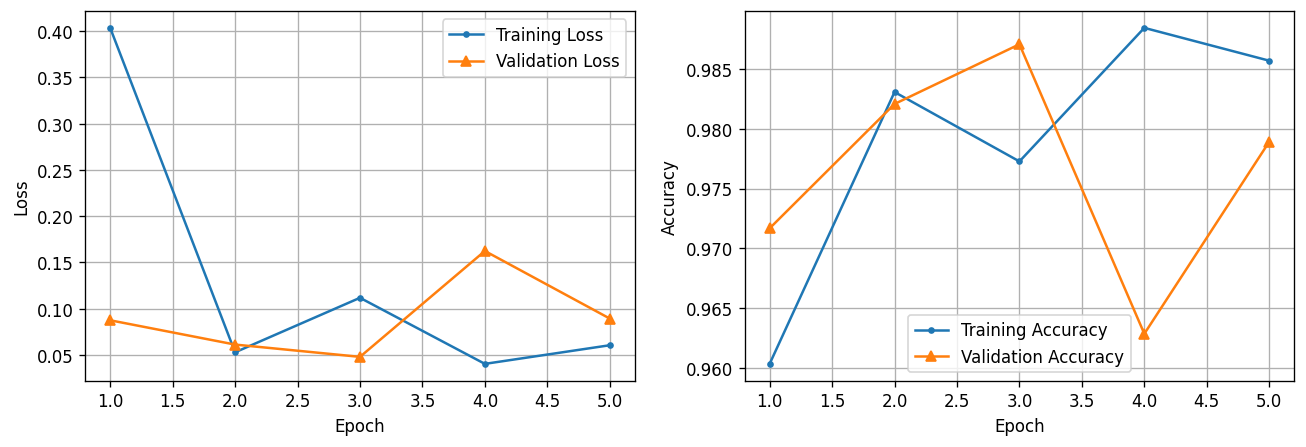

In [ ]:
# Plotting the training curves for LeakyReLU activation
plot_training_curves(pd.DataFrame(history_leakyrelu.history))

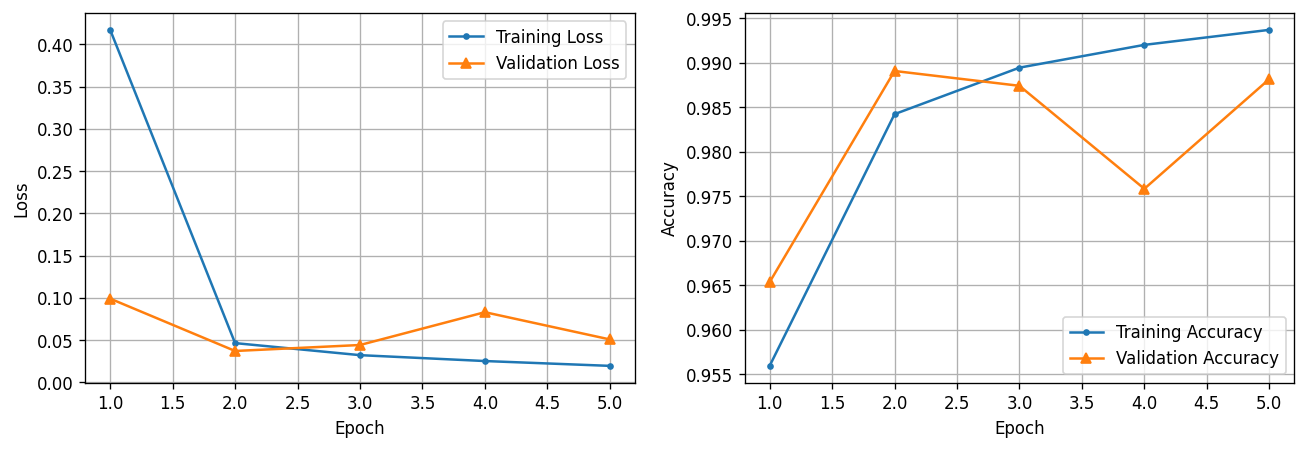

In [ ]:
# Plotting the training curves for RMSprop optimizer
plot_training_curves(pd.DataFrame(history_rmsprop.history))

In [ ]:
from tensorflow.keras import layers

#### Model with ReLU activation, Adam optimizer, and different architecture

##### In this model architecture we made a slightly different configuration compared to the previous models. Here, it consists of a single convolutional layer, followed by a max pooling layer and a flatten layer.

In [ ]:
tf.random.set_seed(42)

cnn_1 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(5, activation = 'sigmoid')
])

cnn_1.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_1 = cnn_1.fit(train_set, epochs = 5, validation_data = val_set)

Epoch 1/5
1500/1500 [==============================] - 192s 126ms/step - loss: 0.1485 - accuracy: 0.9668 - val_loss: 0.0439 - val_accuracy: 0.9860
Epoch 2/5
1500/1500 [==============================] - 189s 126ms/step - loss: 0.0420 - accuracy: 0.9854 - val_loss: 0.0509 - val_accuracy: 0.9843
Epoch 3/5
1500/1500 [==============================] - 187s 125ms/step - loss: 0.0283 - accuracy: 0.9900 - val_loss: 0.1374 - val_accuracy: 0.9623
Epoch 4/5
1500/1500 [==============================] - 211s 141ms/step - loss: 0.0221 - accuracy: 0.9919 - val_loss: 0.0883 - val_accuracy: 0.9766
Epoch 5/5
1500/1500 [==============================] - 188s 125ms/step - loss: 0.0133 - accuracy: 0.9951 - val_loss: 0.0705 - val_accuracy: 0.9838


In [ ]:
cnn_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 516128)            0         
                                                                 
 dense_4 (Dense)             (None, 500)               258064500 
                                                                 
 dense_5 (Dense)             (None, 5)                 2505      
                                                      

#### Evaluation

In [ ]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()
    ax = plt.subplot(1, 2, 2) 
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

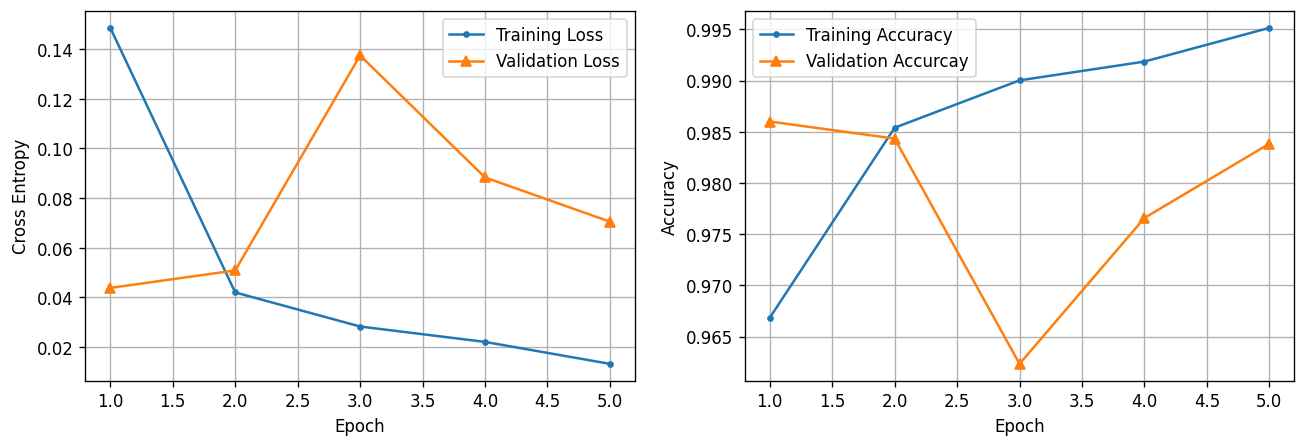

In [ ]:
plot_training_curves(pd.DataFrame(history_1.history))

###### We performed hyperparameter tuning using Keras Tuner, a hyperparameter optimization library for Keras. Reference: https://keras.io/keras_tuner/

In [ ]:
!pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 12.6 MB/s eta 0:00:00


#### Hyperparameter Tuning - The following code performs hyperparameter tuning using the Keras Tuner library. It searches for optimal hyperparameters for a neural network model.

In [ ]:
# Hyperparameter Tuning
import kerastuner as kt

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Rescaling(1./255))
    model.add(layers.Conv2D(filters=hp.Int('filters', min_value=16, max_value=64, step=16), 
                             kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(units=hp.Int('units', min_value=128, max_value=512, step=128), 
                           activation='relu'))
    model.add(layers.Dense(5, activation='sigmoid'))
    
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    
    if optimizer == 'adam':
        model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                      metrics=['accuracy'])
    else:
        model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
                      metrics=['accuracy'])
    
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=2,
    executions_per_trial=2,
    directory='/content/drive/My Drive/tuner_logs',
    project_name='rice_variety_classification'
)

tuner.search(train_set, epochs=3, validation_data=val_set)

<ipython-input-25-5e9d34197a98>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.build((None, 256, 256, 3))  # Build the model by specifying the input shape
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 258064)            0         
                                                                 
 dense (Dense)               (None, 384)               99096960  
                                                                 
 dense_1 (Dense)             (None, 5)                 1925      
                                                        

Epoch 1/10
1500/1500 [==============================] - 154s 100ms/step - loss: 0.0657 - accuracy: 0.9802 - val_loss: 0.1055 - val_accuracy: 0.9721
Epoch 2/10
1500/1500 [==============================] - 136s 91ms/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.1071 - val_accuracy: 0.9707
Epoch 3/10
1500/1500 [==============================] - 139s 93ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.1512 - val_accuracy: 0.9721
Epoch 4/10
1500/1500 [==============================] - 135s 90ms/step - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.1976 - val_accuracy: 0.9689
Epoch 5/10
1500/1500 [==============================] - 147s 98ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.2142 - val_accuracy: 0.9745
Epoch 6/10
1500/1500 [==============================] - 136s 90ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.2305 - val_accuracy: 0.9747
Epoch 7/10
1500/1500 [==============================] - 158s 105ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss:

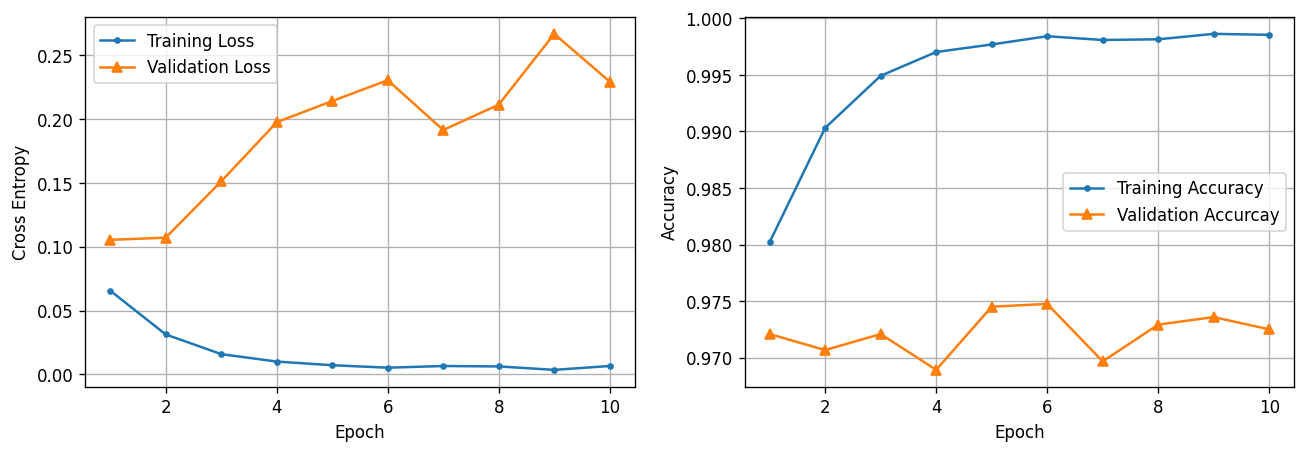

In [ ]:
# Fine-tuning the Best Model
best_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_best = best_model.fit(train_set, epochs=10, validation_data=val_set)

# Evaluation of the Best Model
test_score = best_model.evaluate(test_data, verbose=1)
print("Test Loss:", test_score[0])
print("Test Accuracy:", test_score[1])

plot_training_curves(pd.DataFrame(history_best.history))

In [ ]:
# X_test, y_test = None, None
# for images, labels in test_data.take(100):
#     if X_test == None or y_test == None:
#         X_test = images
#         y_test = labels
#     else:
#         X_test = tf.concat([X_test, images], axis = 0)
#         y_test = tf.concat([y_test, labels], axis = 0)
        
# X_test.shape, y_test.shape

####Test Accuracy Score of Model with LeakyReLU activation and Adam optimizer

In [ ]:
y_pred_proba = cnn_leakyrelu.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)

metrics.accuracy_score(y_test, y_pred)

train_score = cnn_leakyrelu.evaluate(train_data, verbose= 1)
test_score = cnn_leakyrelu.evaluate(test_data, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('*****************************')
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

target_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
print(classification_report(y_test , y_pred, target_names=target_names))

469/469 [==============================] - 23s 49ms/step - loss: 0.0939 - accuracy: 0.9806
Train Loss:  0.05345098301768303
Train Accuracy:  0.9861166477203369
*****************************
Test Loss:  0.0938822329044342
Test Accuracy:  0.9805999994277954
              precision    recall  f1-score   support

     Arborio       0.91      0.96      0.94       356
     Basmati       0.48      1.00      0.65       364
      Ipsala       1.00      0.73      0.84       404
     Jasmine       0.97      0.33      0.49       418
   Karacadag       0.98      0.93      0.95       410

    accuracy                           0.78      1952
   macro avg       0.87      0.79      0.77      1952
weighted avg       0.88      0.78      0.77      1952



####Test Accuracy Score of Model with ReLU activation and RMSprop optimizer

In [ ]:
y_pred_proba = cnn_rmsprop.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)

metrics.accuracy_score(y_test, y_pred)

train_score = cnn_rmsprop.evaluate(train_data, verbose= 1)
test_score = cnn_rmsprop.evaluate(test_data, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('*****************************')
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

target_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
print(classification_report(y_test , y_pred, target_names=target_names))

469/469 [==============================] - 19s 41ms/step - loss: 0.0521 - accuracy: 0.9889
Train Loss:  0.017261208966374397
Train Accuracy:  0.9950833320617676
*****************************
Test Loss:  0.05211157724261284
Test Accuracy:  0.9889333248138428
              precision    recall  f1-score   support

     Arborio       0.99      0.96      0.97       356
     Basmati       0.98      1.00      0.99       364
      Ipsala       1.00      1.00      1.00       404
     Jasmine       0.99      0.98      0.98       418
   Karacadag       0.98      1.00      0.99       410

    accuracy                           0.99      1952
   macro avg       0.99      0.99      0.99      1952
weighted avg       0.99      0.99      0.99      1952



####Test Accuracy Score of Model with ReLU activation, Adam optimizer, and different architecture

In [ ]:

y_pred_proba = cnn_1.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)

61/61 [==============================] - 2s 26ms/step


In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.9846311475409836

In [ ]:
train_score = cnn_1.evaluate(train_data, verbose= 1)
test_score = cnn_1.evaluate(test_data, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('*****************************')
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

469/469 [==============================] - 19s 39ms/step - loss: 0.0653 - accuracy: 0.9842
Train Loss:  0.019947562366724014
Train Accuracy:  0.9948333501815796
*****************************
Test Loss:  0.06532599031925201
Test Accuracy:  0.9842000007629395


In [ ]:

target_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
print(classification_report(y_test , y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Arborio       0.98      0.96      0.97       356
     Basmati       0.98      0.99      0.99       364
      Ipsala       1.00      0.99      1.00       404
     Jasmine       0.99      0.99      0.99       418
   Karacadag       0.97      0.99      0.98       410

    accuracy                           0.98      1952
   macro avg       0.98      0.98      0.98      1952
weighted avg       0.98      0.98      0.98      1952



#### Test Accuracy Score of Best_Model obtained from hyperparameter tuning

In [ ]:
y_pred_proba = best_model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)

metrics.accuracy_score(y_test, y_pred)

train_score = best_model.evaluate(train_data, verbose= 1)
test_score = best_model.evaluate(test_data, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('*****************************')
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


target_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
print(classification_report(y_test , y_pred, target_names=target_names))

469/469 [==============================] - 20s 41ms/step - loss: 0.2449 - accuracy: 0.9735
Train Loss:  0.048000041395425797
Train Accuracy:  0.9937666654586792
*****************************
Test Loss:  0.24489039182662964
Test Accuracy:  0.9735333323478699
              precision    recall  f1-score   support

     Arborio       0.93      0.94      0.93       356
     Basmati       0.96      0.99      0.97       364
      Ipsala       1.00      0.99      0.99       404
     Jasmine       0.98      0.95      0.96       418
   Karacadag       0.97      0.94      0.95       410

    accuracy                           0.96      1952
   macro avg       0.96      0.96      0.96      1952
weighted avg       0.96      0.96      0.96      1952



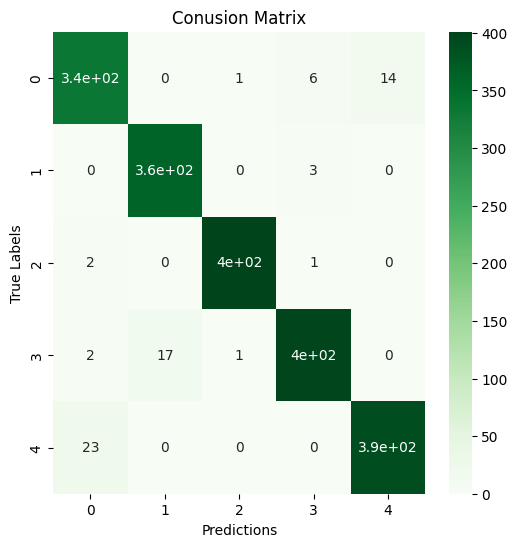

In [ ]:
plt.figure(figsize = (6,6), dpi = 100)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True, cmap = 'Greens')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Conusion Matrix')
plt.show()

In [ ]:
# plot random images from a given dataset, and compare predictions with ground truth
def plot_random_predictions(dataset, model):

    shuffled_data = dataset.shuffle(10)
    class_names = dataset.class_names

    for images, labels in shuffled_data.take(1):
        plt.figure(figsize = (8, 8), dpi = 120)
        y_pred_proba = model.predict(images)

    for i in range(9):
        index = random.randint(0, len(images))
        ax = plt.subplot(3,3, i + 1)

        img = images[index].numpy().astype("uint8")
        y_true = class_names[labels[index]]
        y_pred = class_names[np.argmax(y_pred_proba[index], axis = 0)]
      
        c = 'g' if y_pred == y_true else 'r'
      
        plt.imshow(img)
        plt.title(f'Predicted : {y_pred}\nTrue label : {y_true}', c = c)
        plt.axis(False)

  Plot random images from a test data, and compare predictions with ground truth for  LeakyReLU activation and Adam optimizer

1/1 [==============================] - 0s 39ms/step


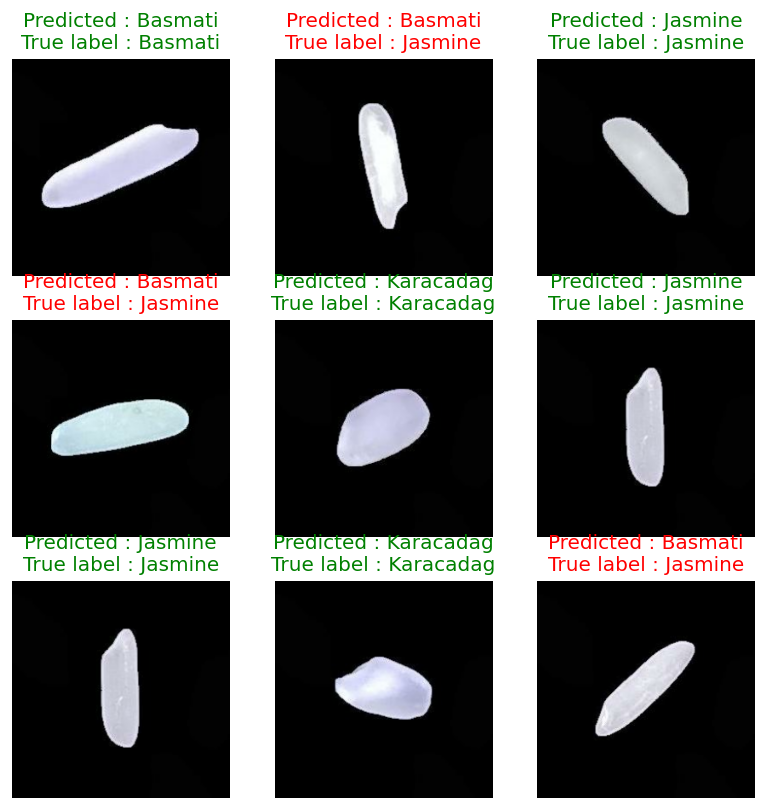

In [ ]:
plot_random_predictions(test_data, cnn_leakyrelu)

#### Plot random images from a test data, and compare predictions with ground truth for Model with ReLU activation and RMSprop optimizer

1/1 [==============================] - 0s 30ms/step


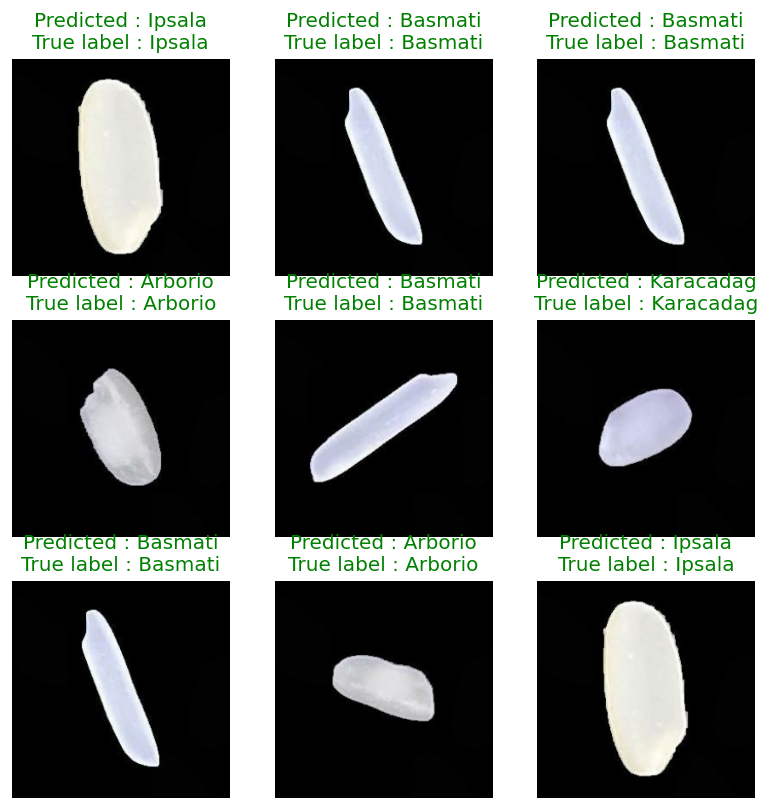

In [ ]:
plot_random_predictions(test_data, cnn_rmsprop)

#### Plot random images from a test data, and compare predictions with ground truth for Model with ReLU activation, Adam optimizer, and different architecture

1/1 [==============================] - 0s 30ms/step


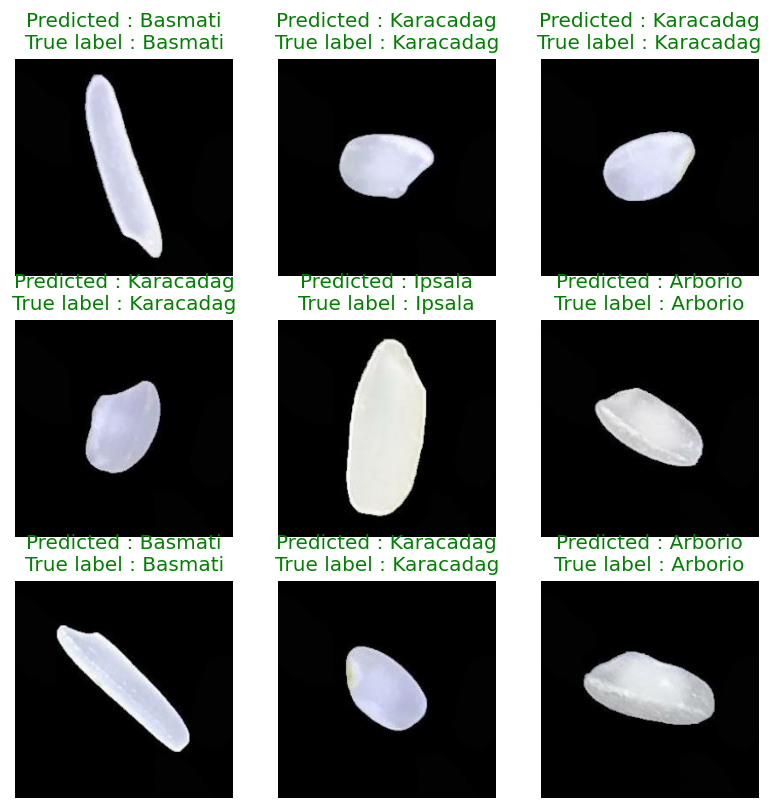

In [ ]:
plot_random_predictions(test_data, cnn_1)

#### Plot random images from a test data, and compare predictions with ground truth for Best_Model obtained from hyperparameter tuning

1/1 [==============================] - 0s 32ms/step


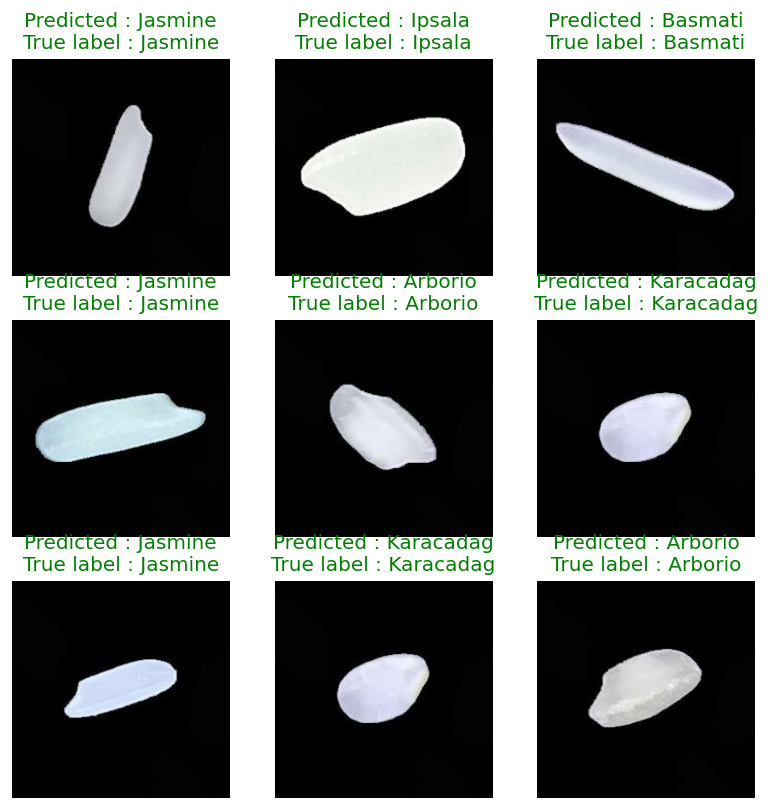

In [ ]:
plot_random_predictions(test_data, best_model)

###### In conclusion, we trained and evaluated four different models for rice variety classification. The first model utilized a ReLU activation function with the Adam optimizer, while the second model used LeakyReLU activation with Adam optimizer. The third model employed ReLU activation with RMSprop optimizer, and the fourth model was the best model obtained from hyperparameter tuning.
###### Among these models, the best model achieved a test accuracy score of 0.9735, slightly lower than the other models. However, it still demonstrated strong performance with high precision, recall, and f1-scores for the different rice varieties. On the other hand, the models with ReLU activation and either Adam or RMSprop optimizer achieved higher test accuracy scores of 0.9889 and 0.9842, respectively.
